In [2]:
import pandas as pd

In [3]:
accessions = pd.read_csv('2029gaccession.csv')
accessions.head()

,V1,V2,V3,V4,V5,V6,name,country,latitude,longitude,collector,collection_date,cs_number,species
0,1,1,0,0,0,1,ALL1-2,France,45.2667,1.48333,Valerie Le Corre,NaN,NaN,Arabidopsis thaliana
1,2,2,0,0,0,1,ALL1-3,France,45.2667,1.48333,Valerie Le Corre,NaN,NaN,Arabidopsis thaliana
2,4,4,0,0,0,1,ALL1-5,France,45.2667,1.48333,Valerie Le Corre,NaN,NaN,Arabidopsis thaliana
3,5,5,0,0,0,1,ALL1-6,France,45.2667,1.48333,Valerie Le Corre,NaN,NaN,Arabidopsis thaliana
4,6,6,0,0,0,1,ALL1-7,France,45.2667,1.48333,Valerie Le Corre,NaN,NaN,Arabidopsis thaliana


In [4]:
climate = pd.read_csv("2029gclimate.csv")
climate.head()

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,pet3,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12
0,117.0,106.0,41.0,5492.0,259.0,3.0,256.0,55.0,81.0,187.0,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
1,117.0,106.0,41.0,5492.0,259.0,3.0,256.0,55.0,81.0,187.0,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
2,117.0,106.0,41.0,5492.0,259.0,3.0,256.0,55.0,81.0,187.0,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
3,117.0,106.0,41.0,5492.0,259.0,3.0,256.0,55.0,81.0,187.0,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
4,117.0,106.0,41.0,5492.0,259.0,3.0,256.0,55.0,81.0,187.0,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0


In [5]:
accessions_climate = accessions.join(climate, how='inner')
accessions_climate.head()

,V1,V2,V3,V4,V5,V6,name,country,latitude,longitude,...,pet3,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12
0,1,1,0,0,0,1,ALL1-2,France,45.2667,1.48333,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
1,2,2,0,0,0,1,ALL1-3,France,45.2667,1.48333,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
2,4,4,0,0,0,1,ALL1-5,France,45.2667,1.48333,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
3,5,5,0,0,0,1,ALL1-6,France,45.2667,1.48333,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0
4,6,6,0,0,0,1,ALL1-7,France,45.2667,1.48333,...,2.2,3.7,5.2,6.3,6.3,5.2,3.4,1.5,0.35,0.0


In [6]:

accessions_climate["Sequence"] = None

with open("pseudogenomes_CAM5.fa", "r") as r:
    lines = r.readlines()
    for i in range(len(lines)):
        if lines[i].startswith(">"):
            accession = lines[i].strip().split("|")[3]
            if i + 1 < len(lines):
                seq = lines[i + 1].strip()
                mask = accessions_climate['V1'].astype(str) == accession
                accessions_climate.loc[mask, 'Sequence'] = seq

accessions_climate = accessions_climate[accessions_climate['Sequence'].notna()]

In [7]:
accessions_climate = accessions_climate[accessions_climate['Sequence'].notna()]
accessions_climate.head()

,V1,V2,V3,V4,V5,V6,name,country,latitude,longitude,...,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12,Sequence
29,88,88,0,0,0,1,CYR,France,47.4000,0.683333,...,3.5,5.1,6.1,6.1,4.9,3.1,1.2,0.20,0.0000,CGGATCTATCTCGATAATAATCTCTAACTTAATCGTNTTTTAGTCT...
36,108,108,0,0,0,1,LDV-18,France,48.5167,-4.066670,...,2.9,4.1,5.0,4.9,4.0,2.3,1.0,0.19,0.0000,CGGANNNNNNNNNNNNNTAATCTCTAACTTAATCGTNTTTTAGTCT...
43,139,139,0,0,0,1,LDV-46,France,48.5167,-4.066670,...,2.9,4.1,5.0,4.9,4.0,2.3,1.0,0.19,0.0000,CGGATCTATCTCGATAATAATCTCTAACTTAATCGTNTTTTAGTCT...
51,159,159,0,0,0,1,MAR2-3,France,47.3500,3.933330,...,3.3,4.8,5.7,5.7,4.6,2.8,1.1,0.19,0.0000,CNGATCTATCTCGATAATAATCTCTAACTTAATCGTNTTTTANTCT...
117,265,265,0,0,0,1,PYL-6,France,44.6500,-1.166670,...,4.2,5.7,6.7,6.7,5.7,3.8,1.8,0.45,0.0082,CNGANNTATCTCGNTAATAATCTCTAACTTAATCGTNTTTTAGTCT...


In [9]:
accessions_climate[[x in [9666, 9667, 9973, 6108, 7130] for x in accessions_climate["V1"]]][["V1", "bio1"]]

,V1,bio1
775,6108,79.0
1068,7130,118.0
1706,9666,120.0
1707,9667,120.0
1971,9973,120.0


In [70]:
accessions_climate = accessions_climate.sort_values("bio1")

with open("sequences_sorted.fa", "w") as f:
    for index, row in accessions_climate.iterrows():
        f.write(f">{row['V1']}|{row['name']}|{row['bio1']}\n{row['Sequence']}\n")

In [68]:
accessions_climate[accessions_climate["name"] == "Col-0"]

,V1,V2,V3,V4,V5,V6,name,country,latitude,longitude,...,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12,Sequence
929,6909,6909,0,0,0,1,Col-0,US,38.3,-92.3,...,4.4,6.0,7.0,7.2,6.2,4.3,2.3,0.94,0.38,CGGATCTATCTCGATAATAATCTCTAACTTAATCGTNTTTTAGTCT...


In [38]:
import vcf

In [ ]:
# Fetch the record at position '2_11534063' and get the sample names


In [348]:
import vcfpy

reader = vcfpy.Reader.from_path('chr2_11531967_1153435fullgenome.vcf')

acc_bio_var_df = accessions_climate[['V1', 'bio1', 'name']].set_index("V1")

for record in reader:
    new_col = record.POS
    record_dict = {}
    for call in record.calls:
        record_dict[int(call.sample)] = call.gt_bases[0] if not call.is_het else call.gt_bases
    record_df = pd.DataFrame.from_dict(record_dict, orient='index', columns=[new_col])
    acc_bio_var_df = acc_bio_var_df.merge(record_df, how = "left", left_index=True, right_index=True)


/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/vcfpy/header.py:583: FieldInfoNotFound: Field "length" not found in header line contig=<ID=1>
  warnings.warn(
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/vcfpy/header.py:583: FieldInfoNotFound: Field "length" not found in header line contig=<ID=2>
  warnings.warn(
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/vcfpy/header.py:583: FieldInfoNotFound: Field "length" not found in header line contig=<ID=3>
  warnings.warn(
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/vcfpy/header.py:583: FieldInfoNotFound: Field "length" not found in header line contig=<ID=4>
  warnings.warn(
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/vcfpy/header.py:583: FieldInfoNotFound: Field "length" not found in header line contig=<ID=5>
  warnings.warn(


In [408]:
intron = acc_bio_var_df[["name", "bio1"] + [i for i in range(11533057, 11534077)]]
intron.head()

,name,bio1,11533057,11533058,11533059,11533060,11533061,11533062,11533063,11533064,...,11534067,11534068,11534069,11534070,11534071,11534072,11534073,11534074,11534075,11534076
V1,,,,,,,,,,,,,,,,,,,,,
88,CYR,116.0,G,T,G,None,G,G,A,A,...,None,None,None,None,None,None,None,None,None,None
108,LDV-18,108.0,G,T,G,A,G,G,A,A,...,A,A,T,T,T,A,T,T,A,G
139,LDV-46,108.0,G,T,G,A,G,G,A,A,...,None,None,None,None,None,None,None,None,None,None
159,MAR2-3,100.0,G,T,G,A,G,G,A,A,...,A,None,None,None,None,None,None,None,None,G
265,PYL-6,130.0,G,T,G,A,G,G,A,A,...,A,A,T,T,T,None,T,T,None,G


In [386]:
import numpy as np

In [429]:
#for all None values, replace with corresponding value in Col-0
intron = intron.reset_index(inplace=False).set_index(["V1", "name", "bio1"])
col0_vals = intron.loc[(6909, "Col-0", 130)].fillna("N")
intron = intron.fillna(col0_vals)
intron.head()

,,,11533057,11533058,11533059,11533060,11533061,11533062,11533063,11533064,11533065,11533066,...,11534067,11534068,11534069,11534070,11534071,11534072,11534073,11534074,11534075,11534076
V1,name,bio1,,,,,,,,,,,,,,,,,,,,,
88,CYR,116.0,G,T,G,A,G,G,A,A,A,C,...,A,A,T,T,T,A,T,T,A,G
108,LDV-18,108.0,G,T,G,A,G,G,A,A,A,C,...,A,A,T,T,T,A,T,T,A,G
139,LDV-46,108.0,G,T,G,A,G,G,A,A,A,C,...,A,A,T,T,T,A,T,T,A,G
159,MAR2-3,100.0,G,T,G,A,G,G,A,A,A,C,...,A,A,T,T,T,A,T,T,A,G
265,PYL-6,130.0,G,T,G,A,G,G,A,A,A,C,...,A,A,T,T,T,A,T,T,A,G


In [440]:
import re

In [479]:
import re

def longest_CT_run(seq):
    matches = re.findall(r'[CTN]+', seq)
    if matches:
        return max(len(m) for m in matches)
    else:
        return 0
    
def longest_GT_run(seq):
    matches = re.findall(r'[GTN]+', seq)
    if matches:
        return max(len(m) for m in matches)
    else:
        return 0
    
def longest_GT_repeat(seq):
    # Find all runs of consecutive "CT"
    matches = re.findall(r'(?:CTT)+', seq)
    if matches:
        # Each "CT" is length 2, so count how many "CT" in the run
        return max(len(m)//3 for m in matches)
    else:
        return 0

# Example:
# longest_CT_repeat("AACTCTCTCTGG")  # returns 3

In [489]:
intron_seqs = intron[[]]

intron_seqs["Sequence"] = intron.apply(lambda x: "".join(x.dropna()), axis=1)
intron_seqs["GT count"] = intron_seqs["Sequence"].apply(lambda x: x.count("GT"))
intron_seqs["AG count"] = intron_seqs["Sequence"].apply(lambda x: x.count("AG"))
intron_seqs["T count"] = intron_seqs["Sequence"].apply(lambda x: x.count("T"))
intron_seqs["C count"] = intron_seqs["Sequence"].apply(lambda x: x.count("C"))
intron_seqs["GT first"] = intron_seqs["Sequence"].apply(lambda x: x[:2] == "GT")
intron_seqs["AG last"] = intron_seqs["Sequence"].apply(lambda x: x[-2:] == "AG")
intron_seqs["Longest CT"] = intron_seqs["Sequence"].apply(lambda x: longest_CT_run(x))
intron_seqs["Longest CT repeat"] = intron_seqs["Sequence"].apply(lambda x: longest_GT_repeat(x))

intron_seqs = intron_seqs.reset_index(inplace=False).set_index("V1")
intron_seqs = intron_seqs.join(accessions_climate.drop(["Sequence", "name", "bio1"], axis=1).set_index("V1"), how = "left")

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_70131/2410947036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intron_seqs["Sequence"] = intron.apply(lambda x: "".join(x.dropna()), axis=1)
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_70131/2410947036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intron_seqs["GT count"] = intron_seqs["Sequence"].apply(lambda x: x.count("GT"))
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_70131/2410947036.py:5: SettingWithCopy

In [497]:
intron_seqs.columns

Index(['name', 'bio1', 'Sequence', 'GT count', 'AG count', 'T count',
       'C count', 'GT first', 'AG last', 'Longest CT', 'Longest CT repeat',
       'V2', 'V3', 'V4', 'V5', 'V6', 'country', 'latitude', 'longitude',
       'collector', 'collection_date', 'cs_number', 'species', 'bio2', 'bio3',
       'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10', 'bio11',
       'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19',
       'prec1', 'prec2', 'prec3', 'prec4', 'prec5', 'prec6', 'prec7', 'prec8',
       'prec9', 'prec10', 'prec11', 'prec12', 'tmin1', 'tmin2', 'tmin3',
       'tmin4', 'tmin5', 'tmin6', 'tmin7', 'tmin8', 'tmin9', 'tmin10',
       'tmin11', 'tmin12', 'tmax1', 'tmax2', 'tmax3', 'tmax4', 'tmax5',
       'tmax6', 'tmax7', 'tmax8', 'tmax9', 'tmax10', 'tmax11', 'tmax12',
       'pet1', 'pet2', 'pet3', 'pet4', 'pet5', 'pet6', 'pet7', 'pet8', 'pet9',
       'pet10', 'pet11', 'pet12'],
      dtype='object')

In [ ]:
#try other bio vars


ValueError: columns overlap but no suffix specified: Index(['V2', 'V3', 'V4', 'V5', 'V6', 'country', 'latitude', 'longitude',
       'collector', 'collection_date', 'cs_number', 'species', 'bio2', 'bio3',
       'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10', 'bio11',
       'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19',
       'prec1', 'prec2', 'prec3', 'prec4', 'prec5', 'prec6', 'prec7', 'prec8',
       'prec9', 'prec10', 'prec11', 'prec12', 'tmin1', 'tmin2', 'tmin3',
       'tmin4', 'tmin5', 'tmin6', 'tmin7', 'tmin8', 'tmin9', 'tmin10',
       'tmin11', 'tmin12', 'tmax1', 'tmax2', 'tmax3', 'tmax4', 'tmax5',
       'tmax6', 'tmax7', 'tmax8', 'tmax9', 'tmax10', 'tmax11', 'tmax12',
       'pet1', 'pet2', 'pet3', 'pet4', 'pet5', 'pet6', 'pet7', 'pet8', 'pet9',
       'pet10', 'pet11', 'pet12'],
      dtype='object')

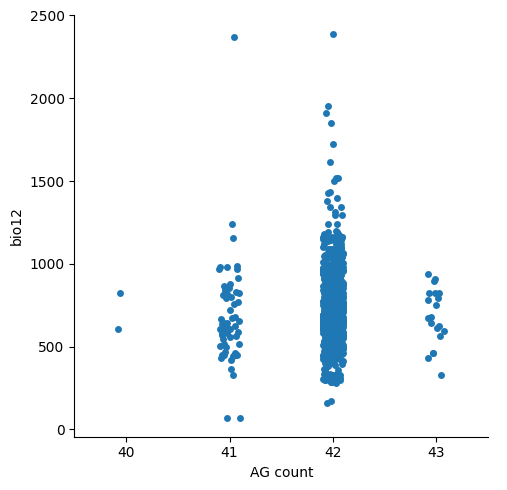

In [507]:
sns.catplot(intron_seqs, x = "AG count", y = "bio12")

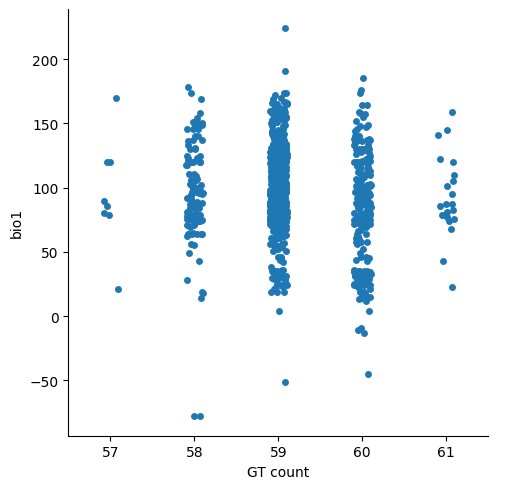

In [437]:
sns.catplot(intron_seqs, x = "GT count", y = "bio1")

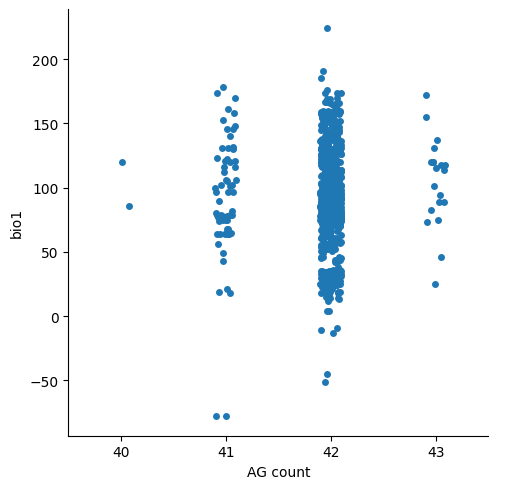

In [466]:
sns.catplot(intron_seqs, x = "AG count", y = "bio1")

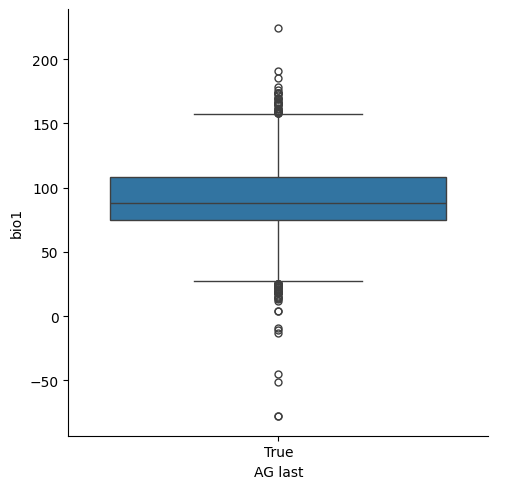

In [431]:
sns.catplot(intron_seqs, x = "AG last", y = "bio1", kind = "box")

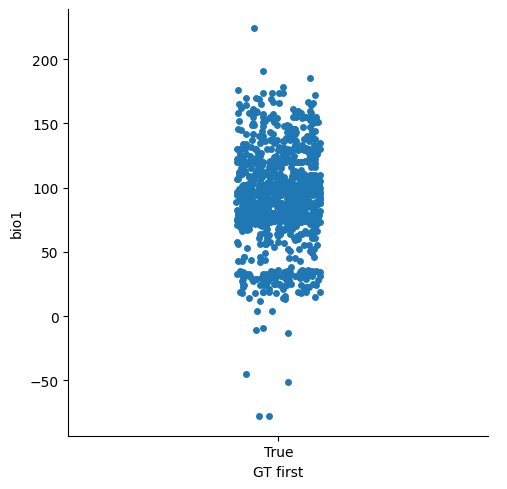

In [432]:
#intron_seqs = intron_seqs.reset_index(inplace=False)
sns.catplot(intron_seqs, x = "GT first", y = "bio1")

In [ ]:
#for all None values, replace with corresponding value in Col-0
col0 = acc_bio_var_df[acc_bio_var_df["name"] == "Col-0"]


In [ ]:
intron_seqs = "".join(x.replace(None, "."))

In [355]:
col0 = acc_bio_var_df[acc_bio_var_df["name"] == "Col-0"]
col0

,bio1,name,11531967,11531968,11531969,11531970,11531971,11531972,11531973,11531974,...,11534349,11534350,11534351,11534352,11534353,11534354,11534355,11534356,11534357,11534358
V1,,,,,,,,,,,,,,,,,,,,,
6909,130.0,Col-0,T,T,T,T,T,C,C,T,...,None,C,A,T,T,T,A,G,G,C


In [198]:
col0_ref = acc_bio_var_df.drop(["bio1", "name"], axis=1)
col0_ref_masked = col0_ref.apply(lambda col: [True if x == col0[col.name].iloc[0] else x for x in col])
col0_ref_masked = acc_bio_var_df[["bio1", "name"]].join(col0_ref_masked)
col0_ref_masked.head()

,bio1,name,11533963,11533964,11533965,11533966,11533967,11533968,11533969,11533970,...,11534154,11534155,11534156,11534157,11534158,11534159,11534160,11534161,11534162,11534163
V1,,,,,,,,,,,,,,,,,,,,,
88,116.0,CYR,None,None,None,None,True,None,None,None,...,True,True,True,G,T,True,True,True,True,True
108,108.0,LDV-18,True,True,True,True,True,True,True,True,...,True,True,True,G,T,True,True,True,True,True
139,108.0,LDV-46,True,True,True,True,True,True,True,True,...,True,True,True,G,T,True,True,True,True,True
159,100.0,MAR2-3,True,True,True,True,True,True,True,True,...,True,True,True,G,T,True,True,True,True,True
265,130.0,PYL-6,True,True,True,True,True,True,True,True,...,True,True,True,G,T,True,True,True,True,True


In [214]:
variation = pd.DataFrame(col0_ref_masked.drop(["bio1", "name"], axis=1).T.apply(lambda x: np.count_nonzero(x)/len(x), axis=1), columns=["Fraction Variation"])
variation_alleles = variation[variation["Fraction Variation"] != 1].index.to_list()
variation_alleles_df = acc_bio_var_df[variation_alleles]
variation_alleles_df

,11533963,11533964,11533965,11533966,11533968,11533969,11533970,11533971,11533972,11533973,...,11534151,11534152,11534154,11534155,11534156,11534159,11534160,11534161,11534162,11534163
V1,,,,,,,,,,,,,,,,,,,,,
88,None,None,None,None,None,None,None,None,None,None,...,None,G,A,A,A,C,A,C,T,G
108,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
139,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
159,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
265,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18694,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
18696,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G
19949,C,A,G,T,T,T,T,T,T,T,...,G,G,A,A,A,C,A,C,T,G


In [298]:
acc_bio_var_df.head()

,bio1,name,11533963,11533964,11533965,11533966,11533967,11533968,11533969,11533970,...,11534155,11534156,11534157,11534158,11534159,11534160,11534161,11534162,11534163,bio1 percentile
V1,,,,,,,,,,,,,,,,,,,,,
88,116.0,CYR,None,None,None,None,None,None,None,None,...,A,A,G,T,C,A,C,T,G,80
108,108.0,LDV-18,C,A,G,T,None,T,T,T,...,A,A,G,T,C,A,C,T,G,75
139,108.0,LDV-46,C,A,G,T,None,T,T,T,...,A,A,G,T,C,A,C,T,G,75
159,100.0,MAR2-3,C,A,G,T,None,T,T,T,...,A,A,G,T,C,A,C,T,G,65
265,130.0,PYL-6,C,A,G,T,None,T,T,T,...,A,A,G,T,C,A,C,T,G,90


'MADQLTDDQISEFKEAFSLFDKDGDGCITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLNLMARKMKDTDSEEELKEAFRVFDKDQNGFISAAELRHVMTNLGEKLTDEEVDEMIKEADVDGDGQINYEEFVKVMMAKRRGKRAMTTKRSSNSAEYKEKNGRRKSHCCIL'

In [304]:
import matplotlib.pyplot as plt

In [ ]:
# Remove accessions (rows) with more than 10 None values across the row in variation_alleles_df
filtered_variation_alleles_df = variation_alleles_df[variation_alleles_df.isnull().sum(axis=1) <= 10]
filtered_variation_alleles_df

In [345]:
acc_bio_var_df[acc_bio_var_df["name"] == "Col-0"].apply(lambda x: ((x == "T").sum() + (x == "C").sum())/x.notna().sum(), axis=1)

V1
6909    0.483516
dtype: float64

In [347]:
GC_df = acc_bio_var_df[range(11533963,11534078)]
bio1 = acc_bio_var_df[["bio1"]]
GC_df = GC_df[GC_df.isnull().sum(axis=1) <= 20]
GC_df["TC"] = GC_df.apply(lambda x: ((x == "T").sum() + (x == "C").sum())/x.notna().sum(), axis=1)
GC_df["TC - Col0"] = GC_df["TC"] - 0.483516
GC_df = GC_df.join(bio1, how = 'left')
GC_df

,11533963,11533964,11533965,11533966,11533967,11533968,11533969,11533970,11533971,11533972,...,11534071,11534072,11534073,11534074,11534075,11534076,11534077,TC,TC - Col0,bio1
V1,,,,,,,,,,,,,,,,,,,,,
108,C,A,G,T,None,T,T,T,T,T,...,T,A,T,T,A,G,G,0.642202,0.158686,108.0
139,C,A,G,T,None,T,T,T,T,T,...,None,None,None,None,None,None,None,0.670000,0.186484,108.0
265,C,A,G,T,None,T,T,T,T,T,...,T,None,T,T,None,G,G,0.657407,0.173891,130.0
350,C,A,G,T,None,T,T,T,T,T,...,None,None,None,None,None,None,None,0.670000,0.186484,108.0
351,C,A,G,T,None,T,T,T,T,T,...,T,A,T,T,A,G,G,0.648649,0.165133,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18694,C,A,G,T,None,T,T,T,T,T,...,T,A,T,T,A,G,G,0.648649,0.165133,36.0
18696,C,A,G,T,None,T,T,T,T,T,...,T,A,T,T,A,G,G,0.648649,0.165133,29.0
19949,C,A,G,T,None,T,T,T,T,T,...,T,A,T,T,A,G,G,0.648649,0.165133,72.0


In [216]:
def percentile_rounded(x, arr):
    pct = (np.sum(arr <= x) / len(arr)) * 100
    return int(round(pct / 5) * 5)

acc_bio_var_df["bio1 percentile"] = acc_bio_var_df["bio1"].apply(lambda x: percentile_rounded(x, acc_bio_var_df["bio1"]))

In [268]:
import scipy.stats as stat

def calculate_corr_temp(id):
    valuecountdf = acc_bio_var_df.groupby("bio1 percentile")[id].value_counts().unstack(fill_value=0)
    if None in valuecountdf.columns or len(valuecountdf.columns) < 2:
        return None

    fraction = valuecountdf.iloc[:, 0]/valuecountdf.iloc[:, 1]
    #alleles = valuecountdf.columns.to_list()
    valuecountdf = valuecountdf.reset_index()
    return stat.pearsonr(valuecountdf["bio1 percentile"], fraction)

def get_alleles(id):
    valuecountdf = acc_bio_var_df.groupby("bio1 percentile")[id].value_counts().unstack(fill_value=0)
    if None in valuecountdf.columns or len(valuecountdf.columns) < 2:
        return None
    alleles = valuecountdf.columns.to_list()
    return alleles


In [262]:
calculate_corr_temp(11534161)

/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4751: RuntimeWarning: invalid value encountered in subtract
  ym = y - ymean


PearsonRResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [271]:
variation["Correlation w Bio1"] = [calculate_corr_temp(id) for id in variation.index.to_list()]
variation["alleles"] = [get_alleles(id) for id in variation.index.to_list()]

variation.dropna().sort_values("Correlation w Bio1")

/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4751: RuntimeWarning: invalid value encountered in subtract
  ym = y - ymean
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4751: RuntimeWarning: invalid value encountered in subtract
  ym = y - ymean
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4751: RuntimeWarning: invalid value encountered in subtract
  ym = y - ymean
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4751: RuntimeWarning: invalid value encountered in subtract
  ym = y - ymean
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4751: RuntimeWarning: invalid value encountered in subtract
  ym = y - ymean
/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4751: RuntimeWarning: invalid value encountered in 

,Fraction Variation,Correlation w Bio1,alleles
11534055,0.908370,"(0.16764920812246495, 0.4676012095026873)","[A, T]"
11534121,0.911013,"(nan, nan)","[C, T]"
11534112,0.931278,"(0.11078234188139949, 0.6326086356325517)","[C, G]"
11534092,1.000000,"(nan, nan)","[A, G]"
11534086,0.927753,"(0.14770978917519928, 0.5228469377282341)","[A, G]"
11534067,0.914537,"(nan, nan)","[A, T]"
11534063,0.899559,"(nan, nan)","[G, T]"
11534158,1.000000,"(-0.23846549002534156, 0.29788219033172103)","[A, T]"
11534029,0.896916,"(0.14232075645204081, 0.5382870920095679)","[G, T]"
11534048,0.901322,"(nan, nan)","[A, C]"


In [220]:
valuecountdf = acc_bio_var_df.groupby("bio1 percentile")[11534076].value_counts().unstack(fill_value=0)
valuecountdf.iloc[:, [0]]

11534076,G
bio1 percentile,
0,28
5,51
10,54
15,53
20,34
25,61
30,59
35,22
40,82


In [273]:
len("ATGGCAGATCAGCTCACCGATGATCAGATCTCTGAGTTCAAGGAAGCTTTTAGCCTTTTCGACAAAGACGGAGATG")

25.333333333333332

PearsonRResult(statistic=np.float64(0.1913067830135361), pvalue=np.float64(0.4061377679034424))

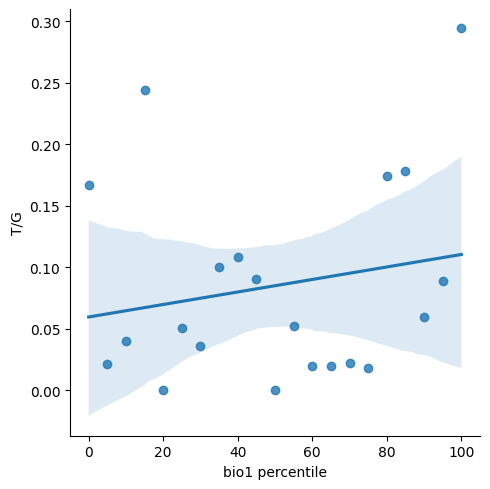

In [190]:
import seaborn as sns
import scipy.stats as stat
sns.lmplot(valuecountdf, x="bio1 percentile", y = "T/G")

stat.pearsonr(valuecountdf["bio1 percentile"], valuecountdf["T/G"])

In [89]:
snp_2_11534063 = pd.DataFrame.from_dict(var_pos, orient='index', columns=['genotype'])
snp_2_11534063.index.name = 'accession'
accessions_climate[['V1', 'bio1']].merge(snp_2_11534063, left_on='V1', right_index=True, how='inner')

,genotype,bio1


In [27]:
i
# Add a new INFO field for climate variable (e.g., bio1) to the VCF header
vcf_reader = vcf.Reader('chr2_11531967_11534358.recode.vcf')
# Prepare to write a new VCF with the added climate variable
vcf_writer = vcf.Writer(open('chr2_11531967_11534358.climate.vcf', 'w'), vcf_reader)
for record in vcf_reader:
    # Get accession/sample name and match to accessions_climate
    for sample in record.samples:
        sample_id = sample.sample
        # Find the corresponding climate value (bio1) for this sample
        row = accessions_climate[accessions_climate['V1'] == sample_id]
        if not row.empty:
            bio1_value = row['bio1'].values[0]
            record.INFO['BIO1'] = bio1_value
    vcf_writer.write_record(record)

TypeError: Writer.__init__() got an unexpected keyword argument 'quoting'

In [18]:
vcf_reader = vcf.Reader(open('chr2_11531967_11534358.recode.vcf', 'r'))
vcf_reader.samples

['10002',
 '10006',
 '10011',
 '10013',
 '10014',
 '159',
 '265',
 '5151',
 '5165',
 '5768',
 '5772',
 '5784',
 '5811',
 '6013',
 '6025',
 '6040',
 '6073',
 '6074',
 '6108',
 '6150',
 '6177',
 '6180',
 '6184',
 '6188',
 '6195',
 '6209',
 '6216',
 '6243',
 '6244',
 '6898',
 '6911',
 '6915',
 '6929',
 '6932',
 '6938',
 '6940',
 '6945',
 '6958',
 '6961',
 '6963',
 '6979',
 '6987',
 '7000',
 '7002',
 '7003',
 '7008',
 '7013',
 '7025',
 '7028',
 '7031',
 '7036',
 '7062',
 '7063',
 '7067',
 '7071',
 '7077',
 '7092',
 '7103',
 '7106',
 '7125',
 '7126',
 '7127',
 '7143',
 '7164',
 '7165',
 '7186',
 '7203',
 '7209',
 '7217',
 '7218',
 '7244',
 '7255',
 '7268',
 '7273',
 '7276',
 '7282',
 '7287',
 '7288',
 '7296',
 '7298',
 '7316',
 '7323',
 '7333',
 '7346',
 '7347',
 '7353',
 '7372',
 '7378',
 '7384',
 '7394',
 '7404',
 '7411',
 '7521',
 '763',
 '765',
 '766',
 '768',
 '772',
 '8214',
 '8230',
 '8231',
 '8240',
 '8247',
 '8249',
 '8311',
 '8312',
 '8351',
 '8354',
 '8357',
 '8376',
 '8387',
 '9

In [ ]:
from Bio import pairwise2
from Bio.Seq import Seq

# Choose the reference sequence (for example, accession '19951')
col0 = 6909
ref_seq = accessions_climate.loc[accessions_climate['V1'] == col0, 'Sequence'].values[0]

# Store alignments in a list
alignments = []
for idx, row in accessions_climate.iterrows():
    seq_id = row['V1']
    seq = row['Sequence']
    aln = pairwise2.align.globalxx(ref_seq, seq, one_alignment_only=True)
    alignments.append({'ref': col0, 'query': seq_id, 'score': aln[0].score, 'alignment': aln[0]})

# Example: print alignment scores for the first 5
for aln in alignments[:5]:
    print(f"Ref: {aln['ref']} Query: {aln['query']} Score: {aln['score']}")

/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x103abb090>>
Traceback (most recent call last):
  File "/Users/kinseylong/Desktop/MoiLab/.conda/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x103abb090>>
Traceback (most recent call last):
  File "/Users/kinseylong/Desktop/MoiLab/.conda/lib/p

In [ ]:
#

In [ ]:
len("""
gtgaggaaactattctcatatcttttctctctttttctttctttctttttt
tgaattgaacaactctgattattgctttattctatgtttgactgttcattattatgcattcgtcccaaatttcatgttatgaactattttgtgactttgggttaaattatttgtttggaa
gtttttagtttattttatattatgtgaagtaccattgtaatggtcgttgaaaaagctatctcttggtattagtacttttttattttattgtattttatagtttgcaatgtttgttaaaaa
aaaaaagggttatttgtgtgattaaaatttgtaggaaaaatgtctgaaaacattatatcggtagtattaaaagcttagaattttttatttttttttaaattgttggtcaatttggaaatt
cccctattttttagaggaatgttggcaataatccatataatttgagtcaaattaaaatatgtttttcttattttacggttcatataagaaaataagtaaactgttagaaaaaagtattat
catttgtaacgattaaaacaagagataaaatttaggaaatacgaaaaagggttaaagaaaaacataacttccatttcattttttctttcaaaagttttcaagcttcagttctctttttcc
ccacttcaactttcagctttgtaaataacattcgtgtttttcttgattcaatatattctacattttaacaaaaacaaataaaaagtggtgtatgcatacagtagttattcgtgaggtaga
acgtaattgtttaaattaaaaggcagatatgttttggggaataaaatcaaaaatggatggtaagtagcaaaagctagatagatgaaatgagaatctccaaacctttaattatgactgaac
ttttttgttggtaaccagta-tttttatttttacttttttttgttacaaggcttagtttcttctttttcttttaaatattatcg--aatcttgatacctaattattttaaaatgtttgta
atttattag
""")

1031